In [58]:
''' Importing Important Libraries '''
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Reading and then loading the dataset onto the notebook.
ds = pd.read_csv('redwine.csv')
ds

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# EXPLORATORY DATA ANALYSIS
In this dataset for the quality prediction, there are **11 attributes** and **1 label or target class.** We will have a look at the target variable and see that how many classes or unique values are present in the target variable.

In [16]:
print(f"The number of unique class in target variable are {ds.quality.nunique()}.\n"
      f"Those unique target variables are {ds.quality.unique()}")

ds.quality.value_counts()

The number of unique class in target variable are 6.
Those unique target variables are [5 6 7 4 8 3]


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

We see that the **quality of Red wine** is defined in ***6 unique values*** starting from 3 all the way upto 8, **3 being the lowest quality** and **8 being the highest quality.** The majority of the wine sample are of medium quality (5 or 6 quality score). Rest samples are of either high quality (7 or 8 quality score) or of low quality (3 or 4 quality score.)

The **dataset is heavily imbalanced.** Working on this dataset can result in overfitting as the model will learn the majority target variable better that the other and give the same result for the prediction.

We now have a look at the datatype of the attributes and the target variable. We also check if there are any null values present into the dataset.

In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


From the above results, we get the information that the ***dataset consists of no null values*** and the **attributes are of float datatype.** The target variable as we learned above has int datatype.

We can also visualise the presence of null values in data using a heatmap.

<AxesSubplot:>

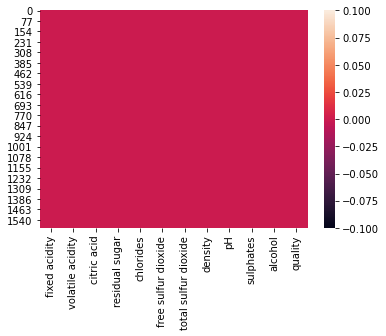

In [43]:
sb.heatmap(ds.isnull())

Now, we use descriptive statistics on the dataset and try to get some insights from them.

In [44]:
ds.iloc[:,0:-1].describe() # excluding the target class

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


From the above values, we can draw some insights for the data.
    
    1 Standard Deviation for the features 'free sulphur dioxide' and and 'total sulphur dioxide' is high. So data spread is 
      present in the features.
    2 The difference between mean and median is large in 'toatl sulphur dioxide' feature. So hte data is skewed in this
      column.
    3 From the minimum values, we can see that no negative values are present in the dataset.
    4 Some outliers may be present in the features 'residual sugar', 'free sulphur dioxide' and 'total sulphur dioxide'.
    
We will now look at the each feature indivisualy and get information regarding the problem from them.

Plotting the boxplot and distplot of this feature to visualise the data spread in the column.

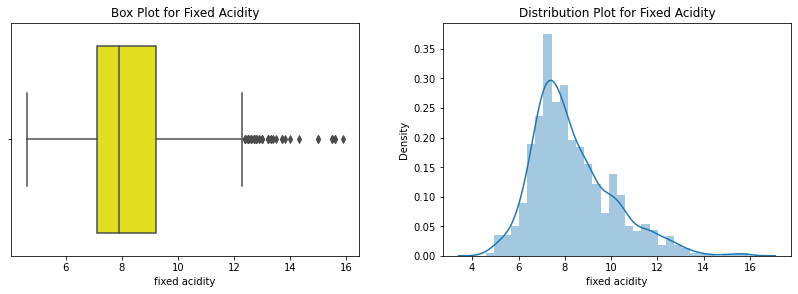

In [127]:
plt.figure(figsize = (12,5))
plt.subplot(1, 2, 1)
sb.boxplot(ds['fixed acidity'], color = 'yellow')
plt.title("Box Plot for Fixed Acidity")

plt.subplot(1, 2, 2)
sb.distplot(ds['fixed acidity'])
plt.title("Distribution Plot for Fixed Acidity")

plt.tight_layout(pad = 4)
plt.show()

From the above plots, we see that the 'fixed acidity' feature have some outliers present in the column values. Also the data is slightly skewed as seen in distplot.

## Similarly,
We can plot the boxplot and check the presence of outliers.

BoxPlots of the features:


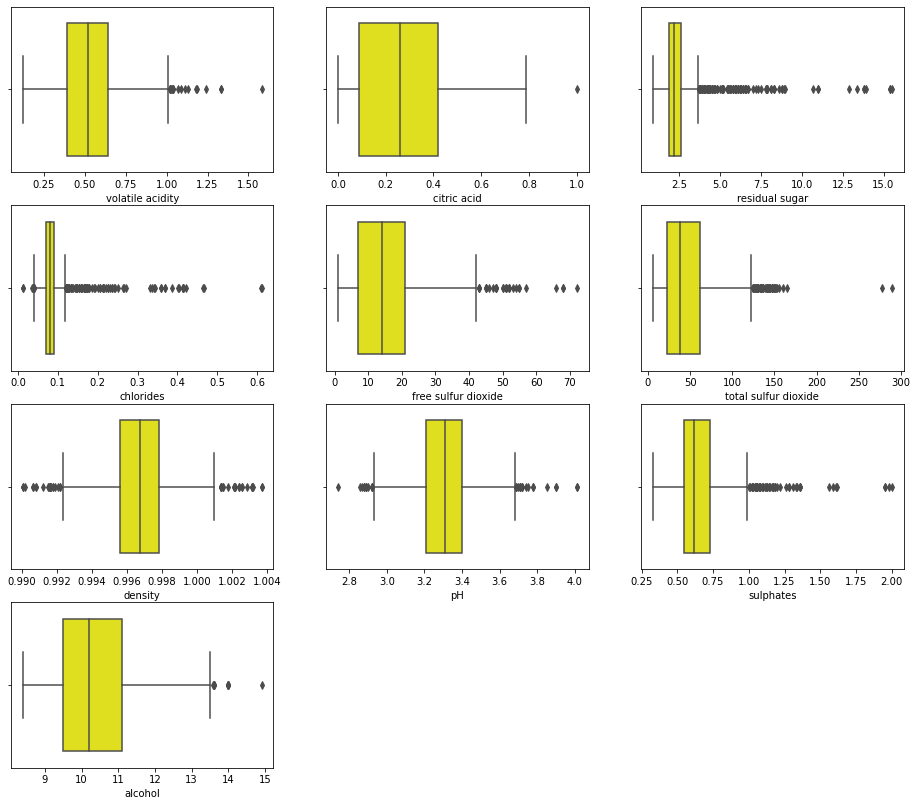

In [158]:
clist = ['volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide',
         'density','pH','sulphates', 'alcohol']

plt.figure(figsize = (16,14))
for i in range(0, len(clist)):
    plt.subplot(4,3, i+1)
    sb.boxplot(ds[clist[i]], color = 'yellow')
print("BoxPlots of the features:")
plt.show()

Above plots indicate that there are **some outliers present in all the features** of the dataset. They need to be removed as that we can improve the learning of the model.

Now, plotting the distplot for the other features to look at their distribution of data:

Distplots of the features:


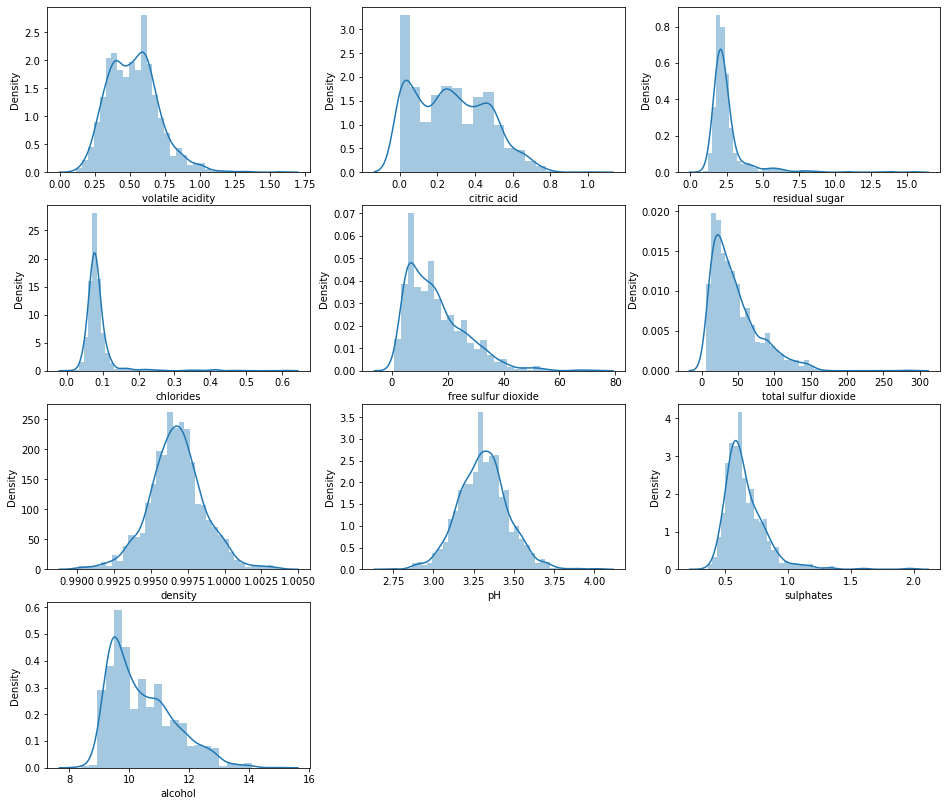

In [160]:
plt.figure(figsize = (16, 14))
for i in range(0, len(clist)):
    plt.subplot(4,3, i+1)
    sb.distplot(ds[clist[i]])
print("Distplots of the features:")
plt.show()

From the above plots, we can see that **'residual sugar', 'chlorides', 'sulphates', 'free sulfur dioxide'** and **'total sulfur dioxide'** are ***positively skewed*** or ***right skewed***. Some skewness is present into the other other data as well. This skewness can be removed by removing the outliers. If skewness is still present, then we use boxcox or log transform to remove the skewness.

Now, we remove the outliers from the dataset using the **z-score meathod.**

In [161]:
from scipy.stats import zscore
zabs = np.abs(zscore(ds)) # calculating the zscore and taking its absolute value.
loc = np.where(zabs > 3) # location of all the outliers using np.where function
loc

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
         555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
         639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
         690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
         821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
         982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
        1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
        1244, 1244, 1260, 1269, 1269, 

In [162]:
# Removing the outliers
ds_new = ds[(zabs < 3).all(axis = 1)]
ds_new.shape

(1451, 12)

From the above shape of new dataset, we get that **1451 rows are left** after removing outliers **out of 1599 rows**. So a total of **148 rows have been removed**. Which is around 9.25% of the total data.

After the removal of outliers, checking if the skewness is treated for the data. For this we compare the old and the new data.

In [163]:
clist = ['fixed acidity', 'volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide',
         'density','pH','sulphates', 'alcohol']
for i in range(0, len(clist)):
    print(f"The old vs new skewness for feature {clist[i]} is: {ds[clist[i]].skew()} : {ds_new[clist[i]].skew()}")

The old vs new skewness for feature fixed acidity is: 0.9827514413284587 : 0.8239340241073351
The old vs new skewness for feature volatile acidity is: 0.6715925723840199 : 0.3806591477316977
The old vs new skewness for feature citric acid is: 0.3183372952546368 : 0.2912974107133157
The old vs new skewness for feature residual sugar is: 4.54065542590319 : 2.4561066979273734
The old vs new skewness for feature chlorides is: 5.680346571971724 : 2.2751624695992265
The old vs new skewness for feature free sulfur dioxide is: 1.250567293314441 : 0.8692496707339011
The old vs new skewness for feature total sulfur dioxide is: 1.515531257594554 : 1.1831606095517972
The old vs new skewness for feature density is: 0.07128766294927483 : 0.055737813135713146
The old vs new skewness for feature pH is: 0.19368349811284427 : 0.11470451042972468
The old vs new skewness for feature sulphates is: 2.4286723536602945 : 0.8914917203295141
The old vs new skewness for feature alcohol is: 0.8608288068888538 : 0

From the above values, we can see that the **skewness is significantly reduced** for the features after the outliers removal. Still some **skewness is present in the for few columns**. We remove skewness from those columns ***using log transform.***

In [166]:
nlist = ['fixed acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide', 'sulphates', 'alcohol']

for i in range(0, len(nlist)):
    ds_new[nlist[i]] = np.log(ds_new[nlist[i]])

In [167]:
ds_new.skew()

fixed acidity           0.377931
volatile acidity        0.380659
citric acid             0.291297
residual sugar          1.227096
chlorides               0.496272
free sulfur dioxide    -0.303456
total sulfur dioxide   -0.096908
density                 0.055738
pH                      0.114705
sulphates               0.342375
alcohol                 0.592414
quality                 0.407865
dtype: float64

Some skewness is still present in the 'residual sugar' columnn. So we use boxcox transform on that feature.

In [173]:
from scipy.stats import boxcox
ds_new['residual sugar'] = boxcox(ds_new['residual sugar'])[0]

In [174]:
ds_new.skew()

fixed acidity           0.377931
volatile acidity        0.380659
citric acid             0.291297
residual sugar          0.017700
chlorides               0.496272
free sulfur dioxide    -0.303456
total sulfur dioxide   -0.096908
density                 0.055738
pH                      0.114705
sulphates               0.342375
alcohol                 0.592414
quality                 0.407865
dtype: float64

The **skewness of the dataset is now treated**, we can visualise it again using the distplot.

Distplots of the features:


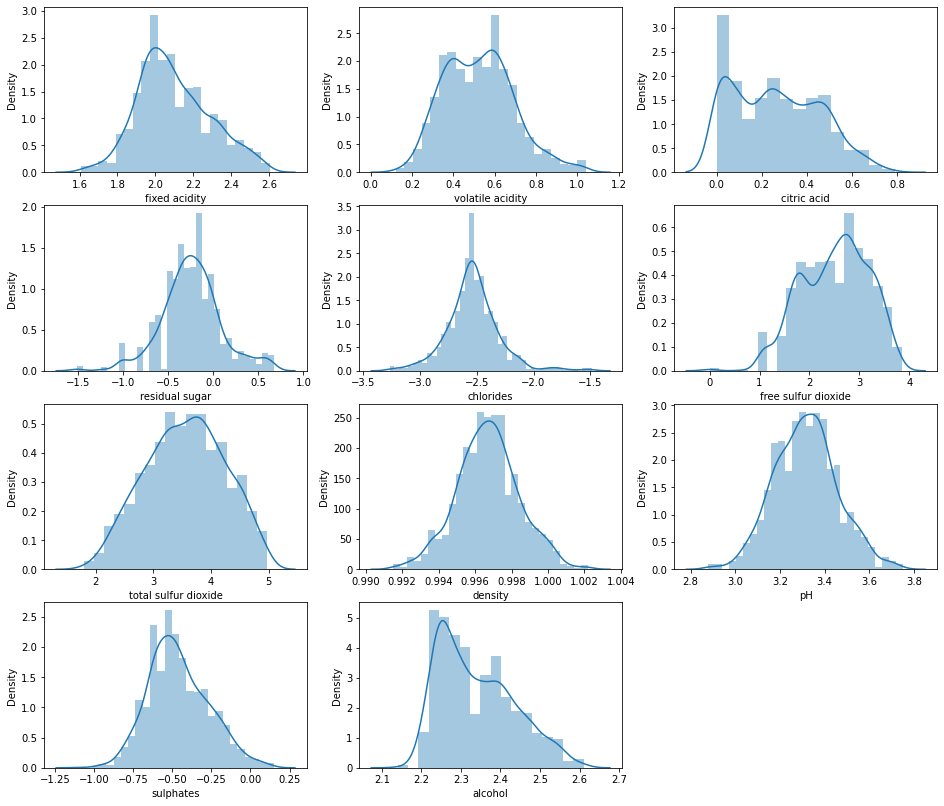

In [177]:
plt.figure(figsize = (16, 14))
for i in range(0, len(clist)):
    plt.subplot(4,3, i+1)
    sb.distplot(ds_new[clist[i]])
print("Distplots of the features:")
plt.show()

We can visualise that the features are more normally distributed than before and skewness is corrected.


Checking the **Correlation between the attributes and target class.**

<AxesSubplot:>

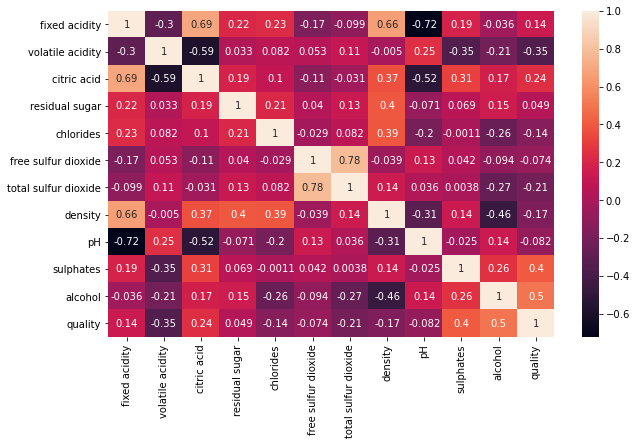

In [181]:
plt.figure(figsize = (10, 6))
sb.heatmap(ds_new.corr(), annot = True)

From the heatmap, we can see that the **'quality' of Wine samples are highly related to the 'alcohol' and 'sulphates'** amount in the wine samples. 'citric acid' and 'fixed acidity' also have some correlation to the quality of wine. ***'free sulfur dioxide' and 'total sulfur dioxide' are highly correlated to each other.*** Similarly ***'citric acid' and 'density' are highly correlated to 'fixed acidity'***

We can visualise the relation between features and target using the scatter plot.

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

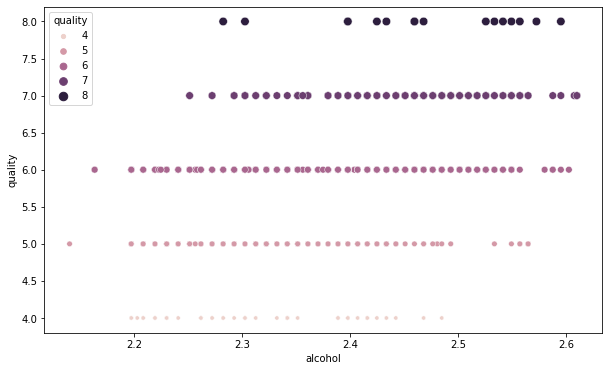

In [197]:
plt.figure(figsize = (10, 6))
sb.scatterplot(x = ds_new['alcohol'], y = ds_new['quality'], hue = ds_new['quality'],
               size = ds_new['quality'])

We can see that the high quality wine has alcohol content more than 2.28 whereas in low quality wine alcohol content starts from 2.19. Similarly, we can plot a scatter plot for the other features and visualise the relation between them and target variable.

plotting a scatter plot to see the relationship between 'free sulphur dioxide' and 'total sulphur dioxide' and how this varies according to the quality of wine.

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='total sulfur dioxide'>

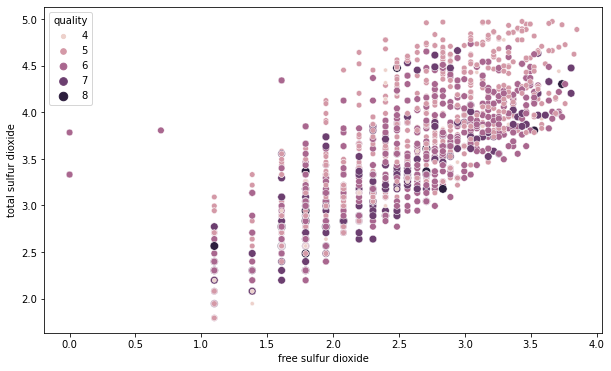

In [202]:
plt.figure(figsize = (10, 6))
sb.scatterplot(x = ds_new['free sulfur dioxide'], y = ds_new['total sulfur dioxide'], hue = ds_new['quality'],
               size = ds_new['quality'])

We see that as the of free sulfur dioxide increases, total sulfur dioxide also increases.
# Data Imbalance:
Now that we have cleaned the data and looked at the correlation between the features and target, we visualise the data imbalance.

In [178]:
fig = px.histogram(ds_new, x = 'quality', color = 'quality', opacity = 0.8, nbins = 15)
fig.show()

As we can see that the data is heavily imbalanced and it can cause overfitting of the model. In order to avoid overfitting of the model and improve the performance and prediction, **balancing the dataset**.

Since **we only have 47 wine samples with 4 quality score** and **only 10 wine samples with 8 quality score.** exact prediction of these values will be hard. So, setting an **arbitrary cutoff for the dependent variable (wine quality) at 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.** So we replace quality score values which are less that 7 by 0 and equal to or greater than 7 by 1.

In [206]:
# Replacing quality score 4, 5 and 6 by 0
ds_new['quality'].replace(to_replace = 4, value = 0, inplace = True)
ds_new['quality'].replace(to_replace = 5, value = 0, inplace = True)
ds_new['quality'].replace(to_replace = 6, value = 0, inplace = True)

# Replacing quality score 7 and 8 by 1
ds_new['quality'].replace(to_replace = 7, value = 1, inplace = True)
ds_new['quality'].replace(to_replace = 8, value = 1, inplace = True)

print(f"The number of unique class in target variable after replacing",
      f"are {ds_new.quality.nunique()}.\nThose new unique target variables are {ds_new.quality.unique()}")

ds_new.quality.value_counts()

The number of unique class in target variable after replacing are 2.
Those new unique target variables are [0 1]


0    1250
1     201
Name: quality, dtype: int64

Now, we balance the dataset using SMOTE class. For that we split the new dataset into x and y variables, x being features and y being target.

In [207]:
x = ds_new.iloc[:, 0:-1]
y = ds_new.iloc[:, -1]

In [210]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_new, y_new = oversample.fit_resample(x, y)

In [214]:
good = y_new[y_new == 1] # values where loan were paid
bad = y_new[y_new == 0] # values where loan were not paid.

fig = go.Figure()
fig.add_traces(go.Histogram(x = good, name='Good Quality', marker_color='purple', opacity=0.9))
fig.add_traces(go.Histogram(x = bad, name='Poor Quality', marker_color='thistle', opacity=0.9))
fig.update_layout(title_text="Red Wine Quality Score", xaxis_title_text='Good or Poor', yaxis_title_text='Value Count')
fig.show()

From the above plot, we can visualise that the ***number of samples for good wine has been increased using SMOTE algorithm***. As a result, the **data imbalance has been removed** and now we have 1250 samples for both good and poor quality of wine.Now, we can build a prediction model without the issue of overfitting.

In [216]:
ds_new = pd.concat([x_new, y_new], axis = 1)
ds_new.shape

(2500, 12)

## Scaling:
During the Exploratory Data Analysis, we found that all the data types are of float datatype. So the scaling of the dataset is not required. Also, there is not a large difference between the maximum  and minimun values in the features across the dataset. So, Min-Max scaling can also be avaided for the data.

# MODEL BUILDING:
## Best Random State:
In order to achive high preformance and accuracy, we first find out the best possible random state where the model will give the best possible score. For that, we write a small code which returns us the beat random state possible.

In [222]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

max_accuracy = 0
best_rs = 0
for i in range(1, 150):
    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.25, random_state = i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > max_accuracy: # after each iteration, acc is replace by the best possible accuracy
        max_accuracy = acc
        best_rs = i
print(f"Best Random State is {best_rs}")

Best Random State is 21


From the above result, **we can split the data using random state as 21.**

In [223]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.25, random_state = 21)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1875, 11) (625, 11) (1875,) (625,)


## Model Selection:
The problem is a classification problem. So we need to select a model which is a classification model. We find out the best model among Logistic Regressor, Decision Tree Classifier, KNN Classifier and SVC Classifier. **Since the datatset is not that huge, we do not need to use bagging or boosting.** We fit the training and testing data one by one into the models and compare their accuracy score.

In [224]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [225]:
# For Logistic Regression
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("Accuracy Score of Logistic Regression model is", accuracy_score(y_test, pred_lg)*100)

# For Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print("Accuracy Score of Decision Tree Classifier model is", accuracy_score(y_test, pred_dtc)*100)

# For K-Nearest Neighbour Classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test)
print("Accuracy Score of K-Nearest Neighbour Classifier model is", accuracy_score(y_test, pred_knc)*100)

# For Support Vector Classifier
svc = SVC(kernel = 'rbf')
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)
print("Accuracy Score of Support Vector Classifier model is", accuracy_score(y_test, pred_svc)*100)

Accuracy Score of Logistic Regression model is 85.28
Accuracy Score of Decision Tree Classifier model is 92.0
Accuracy Score of K-Nearest Neighbour Classifier model is 88.0
Accuracy Score of Support Vector Classifier model is 82.72


From the above accuracy scores, we get find out that the accuracy score for the Decision Tree Classifier is highest. But, this could be the result of overfitting of the model.

## Cross Validation:
In order ***to check whether the accuracy score given by the metrics is real and if model is overfitting or not, we cross validate the model*** for scoring criteria as f1-score. This will tell us if the model is actually performing welll and is ot overfitting. ***The model whose difference between accuracy score and mean accuracy given by Cross Validation will be the least will the best model.***

In [228]:
from sklearn.model_selection import cross_val_score

lg_scores = cross_val_score(lg, x_new, y_new, cv = 10) # cross validating the model
print(lg_scores) # accuracy scores of each cross validation cycle
print(f"Mean of accuracy scores is for Logistic Regression is {lg_scores.mean()*100}\n")

dtc_scores = cross_val_score(dtc, x_new, y_new, cv = 10)
print(dtc_scores)
print(f"Mean of accuracy scores is for Decision Tree Classifier is {dtc_scores.mean()*100}\n")

knc_scores = cross_val_score(knc, x_new, y_new, cv = 10)
print(knc_scores)
print(f"Mean of accuracy scores is for KNN Classifier is {knc_scores.mean()*100}\n")

svc_scores = cross_val_score(svc, x_new, y_new, cv = 10)
print(svc_scores)
print(f"Mean of accuracy scores is for KNN Classifier is {svc_scores.mean()*100}\n")

[0.88  0.852 0.76  0.824 0.92  0.756 0.708 0.792 0.876 0.724]
Mean of accuracy scores is for Logistic Regression is 80.92

[0.892 0.928 0.856 0.88  0.94  0.828 0.864 0.872 0.92  0.86 ]
Mean of accuracy scores is for Decision Tree Classifier is 88.4

[0.928 0.924 0.8   0.84  0.948 0.872 0.796 0.88  0.9   0.808]
Mean of accuracy scores is for KNN Classifier is 86.96

[0.876 0.856 0.692 0.792 0.896 0.748 0.692 0.788 0.872 0.696]
Mean of accuracy scores is for KNN Classifier is 79.08



From the above results, we see that the **least difference between accuracy score and mean accuracy is give by knn classifier.** We can now tune the SVC model using the hyperparameter tuning. After that we evaluate the model on basis of auc score, recall and precison.

## Hyper-Parameter Tuning:

Tuning the SVC model:

In [229]:
from sklearn.model_selection import GridSearchCV

In [234]:
svc = SVC()
parameters = { 'kernel' : ['rbf', 'linear'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'C': [0.1, 1, 10, 100, 1000]}
gs = GridSearchCV(estimator = svc, param_grid = parameters, scoring = 'f1', cv = 5)
gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9400574523537045
{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


**Best parameters for SVC Classifier after tuning are** ***C - 1000, gamma - 1, kernel - 'rbf'.***

# MODEL EVALUATION:
## SVC Evaluation:
Evaluation of SVC using classification report and AUC score.

In [238]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve

In [240]:
svc = SVC(kernel = 'rbf', C = 1000, gamma = 1)
svc.fit(x_train, y_train)
print(svc.score(x_train, y_train))
pred_svc = svc.predict(x_test)

print("Accuracy Score of SVC model is", accuracy_score(y_test, pred_svc))
print("Confusion matrix for SVC Model is")
print(confusion_matrix(y_test, pred_svc))
print("Classification Report of the SVC Model is")
print(classification_report(y_test, pred_svc))

1.0
Accuracy Score of SVC model is 0.9664
Confusion matrix for SVC Model is
[[297  17]
 [  4 307]]
Classification Report of the SVC Model is
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       314
           1       0.95      0.99      0.97       311

    accuracy                           0.97       625
   macro avg       0.97      0.97      0.97       625
weighted avg       0.97      0.97      0.97       625



From the above classification report, we see that the **SVC model has a f1-score of** ***0.97*** and **the precision and recall greater than** ***0.95.*** Now, we plot the ROC Curve and look at the AUC score for the model.

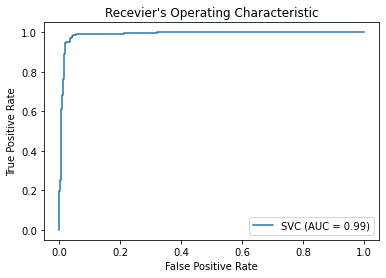

In [241]:
plot_roc_curve(svc, x_test, y_test) # arg. are model name, feature testing data, label testing data.
plt.title("Recevier's Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

From the above ROC Curve, we visualise that the model has an **AUC score of** ***0.99.*** This means that the prediction model is working effeciently.

We can also visualise the performance of the model during testing phase using the histogram plot as shown below.

In [242]:
act_pos = y_test[y_test == 1]
pred_pos = pred_svc[pred_svc == 1]
act_neg = y_test[y_test == 0]
pred_neg = pred_svc[pred_svc == 0]

fig1 = go.Figure()

fig1.add_traces(go.Histogram(x = act_pos, name='Actual Good', marker_color='springgreen', opacity=0.9))

fig1.add_traces(go.Histogram(x = pred_pos, name='Predicted Good', marker_color='mediumspringgreen', opacity=0.9))

fig1.add_traces(go.Histogram(x = act_neg, name='Actual Poor', marker_color='peru', opacity=0.9))

fig1.add_traces(go.Histogram(x = pred_neg, name='Predicted Poor', marker_color='tan', opacity=0.9))

fig1.update_layout(title_text="Model's Wine Quality Prediction Result", xaxis_title_text='Actual and Predicted',
                   yaxis_title_text='Counts', bargap=0.1, bargroupgap=0.3)

fig1.show()

From the histogram above, it is clear that the model's predictions are very accurate. This model can be used to predict and differentiate the wine between good and poor.

# SERIALISATION:
## Saving the model-
The fitted model can now be saved as an object outside the notebook and used for prediction.

In [243]:
import joblib # used for serialisation
joblib.dump(svc, 'Wine_Quality_Prediction_Model.obj') # saving the model as an object

['Wine_Quality_Prediction_Model.obj']